# Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abre el archivo de datos y estudia la información general 

Importa las librerias necesarias


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display

# Ruta de archivo:

In [2]:
df_game = pd.read_csv('games.csv')
display(df_game.head(20))
print('_____________________________________________________')
display(df_game.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


_____________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

# Paso 2. Prepara los datos

-2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

-2.2 Convierte los datos en los tipos necesarios.

-2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

-2.4 Si es necesario, elige la manera de tratar los valores ausentes:

        -2.4.1 Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
        -2.4.2 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
        -2.4.3 Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

-2.5 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

# 2.1 Remplaza los nombres de las columnas

In [3]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
df_game.columns = df_game.columns.str.lower()
display(df_game.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# 2.2 Combierte los datos en tipos necesarios

In [4]:
#Convierte los datos en los tipos necesarios.

# Limpiar la columna 'user_score'
df_game['user_score'] = pd.to_numeric(df_game['user_score'], errors='coerce')

# Convertir las columnas a tipo float
df_game['user_score'] = df_game['user_score'].astype(float)
display(df_game.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

# 2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

En esta sección de código, estamos actualizando los tipos de datos de dos columnas específicas en nuestro conjunto de datos. La columna 'user_score', previamente almacenada como objeto, ha sido transformada a float, ya que contiene valores numéricos decimales.

Esta modificación es fundamental para facilitar futuros análisis de datos, permitiéndonos manipular la información de manera más efectiva. Sin embargo, durante el proceso de conversión, fue necesario realizar una depuración adicional del código en estas columnas. La naturaleza de los datos presentes no permitía una conversión directa, por lo que fue necesario abordar estos casos de manera específica.

# 2.4 Revisión de valores ausentes.
    -2.4.1 Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

In [5]:
# Aqui estamos sacando el porsentaje de valores NAN en cada columna
100*df_game.isna().sum()/df_game.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

# 2.4.2 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
En esta instancia, he tomado la determinación de no modificar los datos existentes. Esta decisión se basa en una serie de consideraciones fundamentales. En primer lugar, la cantidad considerable de valores ausentes en las columnas 'critic_score', 'user_code' y 'rating', que superan el 40%, sugiere que cualquier método de imputación podría introducir sesgos en el conjunto de datos.

Además, es esencial tener en cuenta el posible impacto en el análisis resultante. La distorsión potencial en los resultados podría ser significativa, especialmente debido a la naturaleza sustancial de los datos faltantes en relación con el conjunto de datos en su totalidad.

Por lo tanto, con el fin de mantener la integridad y la precisión de nuestros resultados, he optado por preservar los datos existentes en su estado actual. Esto garantiza una representación fiel de la información disponible, así como la transparencia y la precisión en el análisis subsiguiente.

# 2.4.3 Revisión valores 'tbd'

In [6]:
# Aqui estamos utilisando unique para obtener los valores únicos presentes en la columna 'user_score' 
df_game.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [7]:
# En esta parte estamos cambiando los valores 'tbd' a valores NAN
df_game['user_score'] = df_game['user_score'].replace('tbd', np.nan)
# Aqui estamos conbirtiendo de nuevo la columna 'user_score' a tipo de dato float
df_game['user_score'] = df_game['user_score'].astype(float)
df_game.user_score.unique()


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Aquí estamos llevando a cabo la conversión de los valores 'TBD' a valores NaN (Not a Number), ya que ambos representan una ausencia de datos. Opté por esta transformación a NaN, dado que esta representación nos facilitará la manipulación de datos en futuros análisis. La uniformidad en la codificación de valores faltantes contribuirá a una gestión más coherente y eficiente de los datos, lo que promueve la precisión y fiabilidad en nuestras operaciones analíticas.

# 2.5 Calcula las ventas totales

In [8]:
# Visualisamos las colunmas del Dataframe
df_game.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
# Con este codigo estamos sumando todas las ventas de cada pais, sumandolas y creando una nueva columna llamada 'sales_all'
df_game['sales_all'] = df_game['na_sales'] + df_game['eu_sales'] + df_game['jp_sales'] + df_game['other_sales']

In [10]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Paso 3. Analiza los datos
3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

3.4 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

3.5 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

3.6 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

3.7 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?Describe tus hallazgos.

3.8 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

3.9 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

3.10 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?.

# 3.1 Juegos lanzados en diferentes años.


In [11]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [12]:
# Con este codigo estamos agrupando la columna 'year_of_release' y contando los videojuegos de la columna 'name'
count_games =  df_game.groupby('year_of_release')['name'].count()
display(count_games.head())

year_of_release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: name, dtype: int64

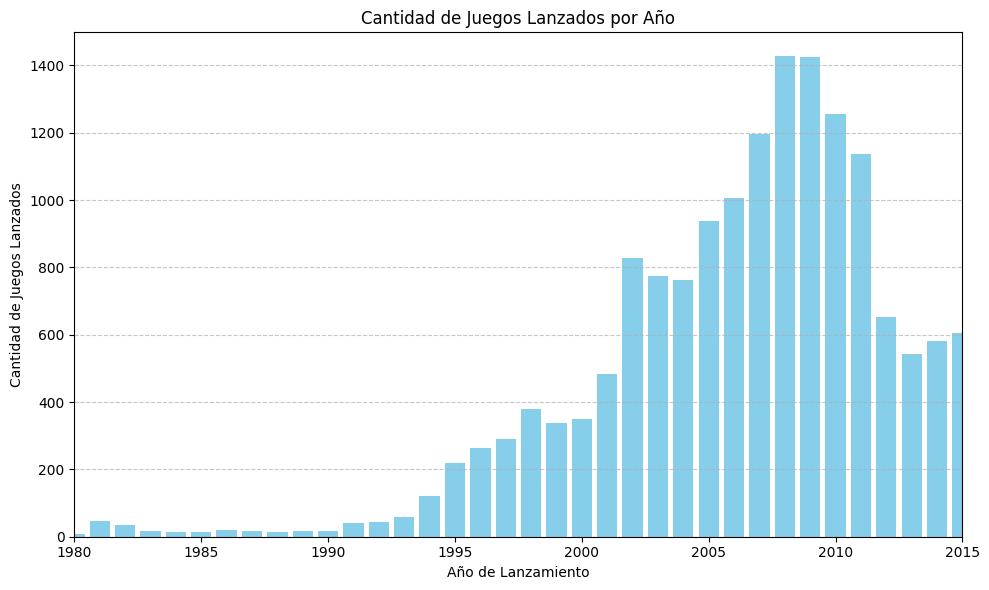

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(count_games.index, count_games.values, color='skyblue')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Año')

plt.xlim(1980, 2015)

plt.xticks(range(1980, 2016, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En el gráfico, se observa un notable sesgo en el lado izquierdo, donde los años comprendidos entre 1980 y 1993 muestran una escasa cantidad de ventas de videojuegos. Sin embargo, a partir de 1995, se observa un marcado aumento en las ventas, alcanzando su punto máximo alrededor de 2010. Posteriormente, se evidencia un descenso gradual hasta el año 2015.

# 3.2 Ventas por plataforma

In [14]:
display(df_game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
# Con  este codigo estamos creando una tabla dinamica 
sales_by_console = df_game.pivot_table(index='platform', values='sales_all', aggfunc='sum')
display(sales_by_console.sort_values(by='sales_all', ascending=False).head())

,sales_all
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [16]:
# Con estos codigos estamos creando un nuevo dataframe llamado platform_distribution y estamos agrupandole las columnas 'year_of_release' y 'platform' junto con su suma total de ventas
platform_list = ('PS2', 'X360', 'PS3', 'Wii', 'DS')
games = df_game[df_game['platform'].isin(platform_list)]

platform_distribution = games.groupby(['year_of_release', 'platform'])['sales_all'].sum().reset_index()

platform_distribution.head()

,year_of_release,platform,sales_all
0,1985.0,DS,0.02
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31


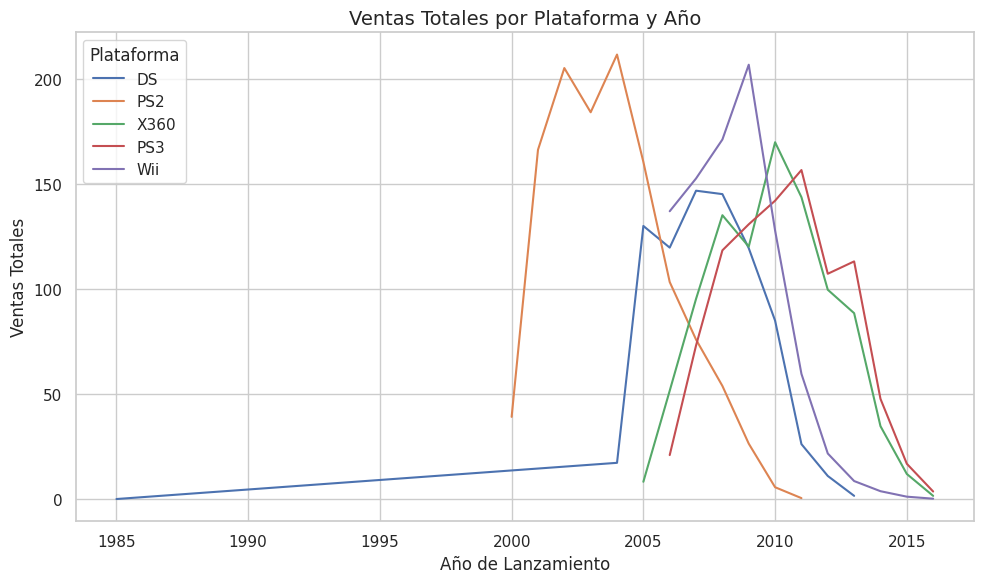

In [17]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=platform_distribution, hue='platform', x='year_of_release', y='sales_all')

# Configurar los ejes y etiquetas
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.title('Ventas Totales por Plataforma y Año', fontsize=14)

# Ajustar la leyenda
plt.legend(title='Plataforma', loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

El análisis del cuadro revela patrones significativos en el desempeño de diferentes consolas de videojuegos a lo largo del tiempo:

    En primer lugar, la PlayStation 2 (PS2) experimentó un notable auge desde su lanzamiento en 2000 hasta 2004, seguido de una marcada disminución hasta 2010.

    Por otro lado, la Xbox 360 mostró un ascenso gradual desde su introducción en 2005, alcanzando su punto más alto en 2010 antes de iniciar un declive hasta 2015.

    La Nintendo DS, siendo una de las primeras en el mercado, exhibió un crecimiento moderado hasta 2004, momento en el que sus ventas se incrementaron notablemente, llegando al máximo en 2008.

    La PlayStation 3 (PS3), lanzada en 2006, alcanzó su punto álgido en 2011 antes de experimentar un descenso hasta 2015.

    La Wii, lanzada en 2005 con ventas iniciales robustas, experimentó un declive continuo hasta 2015.

En conclusión, observamos que todas las consolas tienden a alcanzar su punto máximo de ventas en un determinado lapso de tiempo, pero luego experimentan un declive en la segunda mitad de su ciclo de vida. Para obtener una comprensión más precisa, se recomienda considerar un promedio de ventas a lo largo de períodos de cinco años. Es importante destacar que el análisis de datos más significativos abarca desde el año 2000 en adelante.

# 3.6 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


<Axes: xlabel='sales_all', ylabel='platform'>

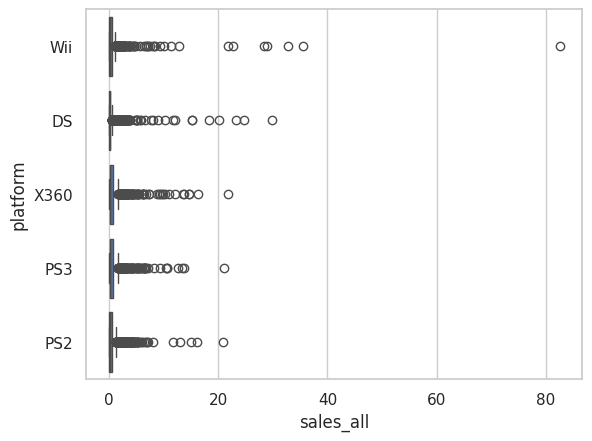

In [27]:
# Imprime un diagrama de caja
sns.boxplot(data= games, x= 'sales_all', y = 'platform')

En esta sección, los diagramas de caja no proporcionan información relevante más allá de la presencia de numerosos valores atípicos en los datos. Por consiguiente, nuestra estrategia será eliminar dichos valores atípicos.

<Axes: xlabel='sales_all', ylabel='platform'>

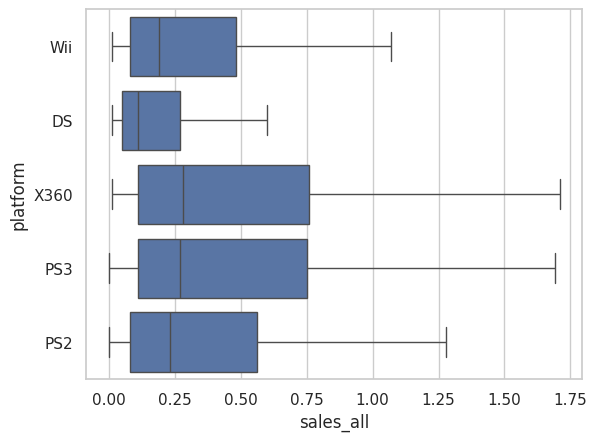

In [28]:
# Eliminamos valores atipicos para visualisar el diagrama
sns.boxplot(data= games, x= 'sales_all', y = 'platform', showfliers=False)

Lo que podemos observar en estos cinco diagramas de caja es que la media de las ventas de la plataforma DS está notablemente rezagada en comparación con las demás plataformas. Asimismo, se aprecia una marcada disparidad en las medianas de las plataformas, exceptuando a las de X360 y PS3, donde se observa una conducta similar.

# 3.8 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [51]:
popular_df = games[['critic_score', 'platform', 'year_of_release']].copy()
popular_df_ps2 = popular_df[popular_df['platform'] == 'PS2']
popular_df_ps2

,critic_score,platform,year_of_release
17,95.0,PS2,2004.0
24,95.0,PS2,2002.0
28,95.0,PS2,2001.0
38,97.0,PS2,2001.0
48,89.0,PS2,2004.0
...,...,...,...
16670,NaN,PS2,2008.0
16671,NaN,PS2,2008.0
16683,NaN,PS2,2008.0
16689,NaN,PS2,2008.0


<Axes: xlabel='year_of_release', ylabel='critic_score'>

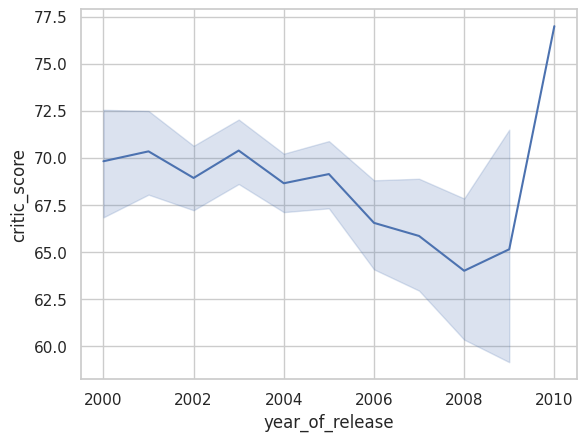

In [50]:
sns.lineplot(data= popular_df_ps2, x= 'year_of_release', y = 'critic_score')